In [ ]:
# default_exp funcs.output_trafo

In [ ]:
%load_ext autoreload
%autoreload 2

# Transformations of sampled data and model output into emitter dataframes

In [ ]:
#export
from decode_fish.imports import *
import torch.nn.functional as F
from decode_fish.funcs.plotting import *

In [ ]:
#export
def sample_to_df(locs, x_os, y_os, z_os, ints, px_size=[100,100,100]):
    
    n_locs = len(ints)
    
    x = locs[-1] + x_os + 0.5 
    y = locs[-2] + y_os + 0.5 
    z = locs[-3] + z_os + 0.5 

    frame_idx = locs[0]
    loc_idx = torch.arange(n_locs)
    
    df = DF({'loc_idx': loc_idx.cpu(),
                       'frame_idx': frame_idx.cpu(),
                       'x': x.cpu()*px_size[0],
                       'y': y.cpu()*px_size[1], 
                       'z': z.cpu()*px_size[2], 
                       'int': ints.cpu()})

    return df

In [ ]:
from decode_fish.engine.point_process import PointProcessUniform
locs_3d, x_os_3d, y_os_3d, z_os_3d, ints_3d, output_shape = PointProcessUniform(torch.ones([1,1,40,40,40])*0.001, min_int=0.2).sample()
sample_to_df(locs_3d, x_os_3d, y_os_3d, z_os_3d, ints_3d)

,loc_idx,frame_idx,x,y,z,int
0,0,0,2392.886230,846.727112,729.317200,0.475737
1,1,0,1749.431763,555.678711,1224.216675,0.722363
2,2,0,1577.261719,1437.142822,1468.529419,0.947365
3,3,0,42.998089,3809.424561,1620.771606,0.973113
4,4,0,3258.859619,113.593315,2390.018799,0.607115
5,5,0,3463.310547,2326.977051,2304.056885,0.869649
6,6,0,410.438446,1453.519409,2437.666992,0.797578
7,7,0,1219.824463,3947.847656,2508.129395,0.313952
8,8,0,1742.593994,407.435944,2642.466309,0.291382
9,9,0,810.159485,3333.047852,3194.492676,0.525651


In [ ]:
#export
class SIPostProcess(torch.nn.Module):
    
    def __init__(self, m1_threshold:float = 0.03, m2_threshold:float = 0.3, samp_threshold=0.1, px_size=[100,100,100], diag=0):
        
        super().__init__()
        self.m1_threshold = m1_threshold
        self.m2_threshold = m2_threshold
        self.samp_threshold = samp_threshold
        self.diag = diag
        self.px_size = px_size
        
        if not diag:
            d1 = 0; d2 = 0
        else:
            d1 = 1/np.sqrt(2); d2 = 1/np.sqrt(3)
        self.filt = torch.FloatTensor([[[d2,d1,d2],[d1,1,d1],[d2,d1,d2]],
                                       [[d1, 1,d1],[1, 1, 1],[d1, 1,d1]],
                                       [[d2,d1,d2],[d1,1,d1],[d2,d1,d2]]])[None,None]
        
    def spatial_integration(self, p):

        device = p.device

        with torch.no_grad():

            p_copy = p + 0

            # probability values > threshold are regarded as possible locations
            p_clip = torch.where(p>self.m1_threshold,p,torch.zeros_like(p))

            # localize maximum values within a 3x3 patch
            pool = F.max_pool3d(p_clip,3,1,padding=1)
            max_mask1 = torch.eq(p, pool).float()

            # Add probability values from the 4 adjacent pixels
            conv = F.conv3d(p, self.filt.to(device) ,padding=1)
            p_ps1 = (max_mask1 * conv)

            # In order do be able to identify two fluorophores in adjacent pixels we look for probablity values > 0.5 that are not part of the first mask

            p_copy *= (1-max_mask1)
            p_clip = torch.where(p_copy>self.m2_threshold, p_copy,torch.zeros_like(p_copy))
            max_mask2 = torch.where(p_copy>self.m2_threshold, torch.ones_like(p_copy),torch.zeros_like(p_copy))
            p_ps2 = max_mask2*conv

            # This is our final clustered probablity which we then threshold (normally > 0.7) to get our final discrete locations 
            p_ps = p_ps1 + p_ps2        

            return p_ps

    def forward(self, res_dict, ret='df'):

        probs =  torch.sigmoid(res_dict['logits'])
        res_dict['Probs_si'] = self.spatial_integration(probs)
        res_dict['Samples_si'] = torch.where(res_dict['Probs_si'] > self.samp_threshold, torch.ones_like(res_dict['Probs_si']), torch.zeros_like(res_dict['Probs_si']))
        
        if ret == 'df':
        
            res_dict = {k:v.cpu() for (k,v) in res_dict.items()}
            samples = res_dict['Samples_si']
            nonz_idx = samples.nonzero(as_tuple=True)

            pos_x, pos_y, pos_z = nonz_idx[-1] ,nonz_idx[-2], nonz_idx[-3]
            x = pos_x + res_dict['xyzi_mu'][:,[0]][nonz_idx] + 0.5 
            y = pos_y + res_dict['xyzi_mu'][:,[1]][nonz_idx] + 0.5 
            z = pos_z + res_dict['xyzi_mu'][:,[2]][nonz_idx] + 0.5 

            loc_idx = torch.arange(len(x))
            frame_idx = nonz_idx[0]

            df = DF({'loc_idx': loc_idx,
                               'frame_idx': frame_idx,
                               'x': x*self.px_size[0],
                               'y': y*self.px_size[1], 
                               'z': z*self.px_size[2], 
                               'prob': res_dict['Probs_si'][nonz_idx], 
                               'int': res_dict['xyzi_mu'][:,[3]][nonz_idx], 
                               'int_sig': res_dict['xyzi_sigma'][:,[3]][nonz_idx], 
                               'x_sig': res_dict['xyzi_sigma'][:,[0]][nonz_idx]*self.px_size[0], 
                               'y_sig': res_dict['xyzi_sigma'][:,[1]][nonz_idx]*self.px_size[1], 
                               'z_sig': res_dict['xyzi_sigma'][:,[2]][nonz_idx]*self.px_size[2]})

            return df
        
        elif ret == 'micro':

            locations = res_dict['Samples_si'].nonzero(as_tuple=True)
            x_os_3d = res_dict['xyzi_mu'][:,[0]][locations]
            y_os_3d = res_dict['xyzi_mu'][:,[1]][locations]
            z_os_3d = res_dict['xyzi_mu'][:,[2]][locations]
            ints_3d = res_dict['xyzi_mu'][:,[3]][locations] 
            output_shape  = res_dict['Samples_si'].shape

            return locations, x_os_3d, y_os_3d, z_os_3d, ints_3d, output_shape
        
        elif ret == 'dict':
            
            return res_dict

#export
class ISIPostProcess(SIPostProcess):
    
    def __init__(self, m1_threshold:float = 0.1, samp_threshold=0.1, px_size=[100,100,100], diag=False):
        
        super().__init__(m1_threshold = m1_threshold, samp_threshold=samp_threshold, px_size=px_size, diag=diag)
        self.m2_threshold = None
        
    def spatial_integration(self, p):

        device = p.device
        
        with torch.no_grad():
            
            p_ret = 0
            tot_mask = torch.ones_like(p)
            
            while True:
                
                p_copy = p + 0

                # probability values > threshold are regarded as possible locations
                p_clip = torch.where(p>self.m1_threshold,p,torch.zeros_like(p))*tot_mask

                # localize maximum values within a 3x3 patch
                pool = F.max_pool3d(p_clip,3,1,padding=1)
                max_mask1 = torch.eq(p, pool).float()
                max_mask1[p==0] = 0
                max_mask1 *= tot_mask
                
                tot_mask *= (torch.ones_like(max_mask1) - max_mask1)
                
                # Add probability values from the adjacent pixels
                conv = F.conv3d(p, self.filt.to(device) ,padding=1)
                p_ps = torch.clamp_max(max_mask1 * conv, 1) 

                p_ret += p_ps
                
                p_proc = F.conv3d(max_mask1, self.filt.to(device),padding=1)*p
                p_proc = p_proc/p_proc.sum() * p_ps.sum()

                p = p - p_proc
                torch.clamp_min_(p, 0)
                
                if not max_mask1.sum():
                    break
            
            return p_ret

In [ ]:
# model_out = torch.load('../data/model_output.pt')
# probs_inp = torch.sigmoid(model_out['logits'])[:,:,:,250:300,200:250]

# model_out = torch.load('../data/model_batch_output.pt')
# probs_inp = torch.sigmoid(model_out['logits'])

model_out = torch.load('../data/model_output_1.pt')
probs_inp = torch.sigmoid(model_out['logits'])[:,:,:,:,:]
gt_df = torch.load('../data/gt_1.pt')

In [ ]:
from decode_fish.funcs.evaluation import *
from decode_fish.funcs.emitter_io import *
post_proc1 = SIPostProcess(m1_threshold=0.03, m2_threshold=0.25, samp_threshold=0.1, px_size=[100,100,100], diag=True)
post_proc2 = ISIPostProcess(m1_threshold=0.05, samp_threshold=0.3, px_size=[100,100,100], diag=True)

matching(px_to_nm(gt_df),  post_proc1.forward(model_out, ret='df'), tolerance=500, print_res=True)
_=matching(px_to_nm(gt_df),  post_proc2.forward(model_out, ret='df'), tolerance=500, print_res=True)

Recall: 0.965
Precision: 0.712
Jaccard: 69.375
RMSE_vol: 26.849
Eff_3d: 66.562
FN: 4.0 FP: 45.0
Shift: -0.70,-0.50,-1.73
Recall: 0.904
Precision: 0.972
Jaccard: 88.135
RMSE_vol: 19.482
Eff_3d: 84.649
FN: 11.0 FP: 3.0
Shift: 0.28,0.77,-1.55


115


Text(0.5, 1.0, '107.0')

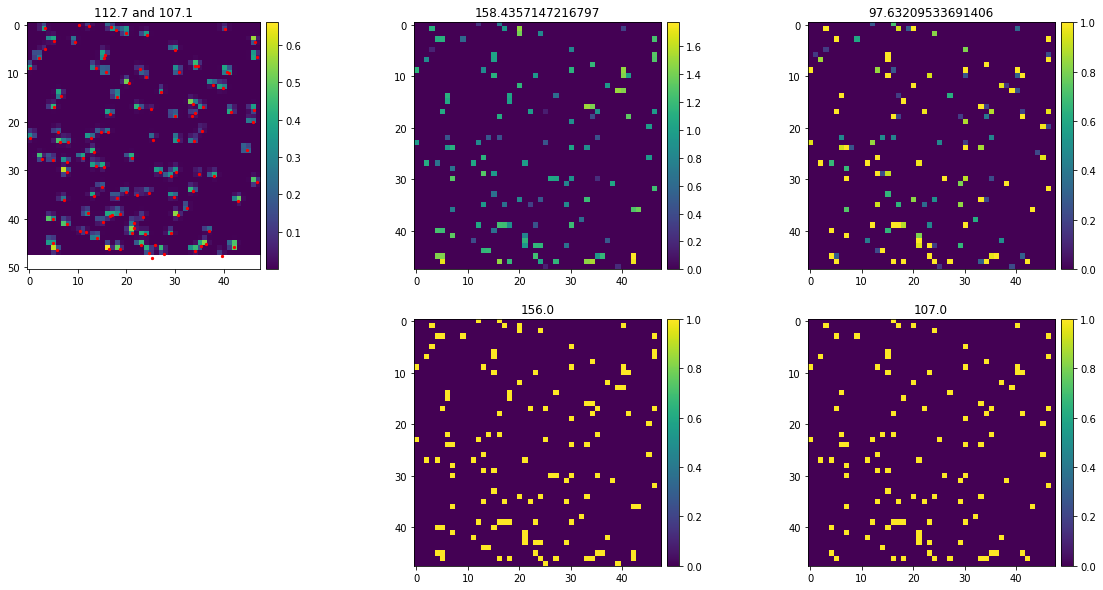

In [ ]:
print(len(gt_df))
plt.figure(figsize=(20,10))
plt.subplot(231)
probs = probs_inp[0,0].detach().cpu()
probsf = probs + 0
probsf[probsf<0.01] = 0
im = plt.imshow(probs.max(dim=0).values)
plt.scatter(gt_df['x'],gt_df['y'], color='red', s=5.)
plt.title(f'{probs.sum().item():.1f} and {probsf.sum().item():.1f}'.format())
add_colorbar(im)

recs = post_proc1.forward(model_out, ret='dict')
plt.subplot(232)
im = plt.imshow(recs['Probs_si'][0,0].cpu().max(dim=0).values)
add_colorbar(im)
plt.title(recs['Probs_si'][0,0].sum().item())

plt.subplot(235)
im = plt.imshow(recs['Samples_si'][0,0].cpu().max(dim=0).values)
add_colorbar(im)
plt.title(recs['Samples_si'][0,0].sum().item())

recs = post_proc2.forward(model_out, ret='dict')
plt.subplot(233)
im = plt.imshow(recs['Probs_si'][0,0].cpu().max(dim=0).values)
add_colorbar(im)
plt.title(recs['Probs_si'][0,0].sum().item())

plt.subplot(236)
im = plt.imshow(recs['Samples_si'][0,0].cpu().max(dim=0).values)
add_colorbar(im)
plt.title(recs['Samples_si'][0,0].sum().item())

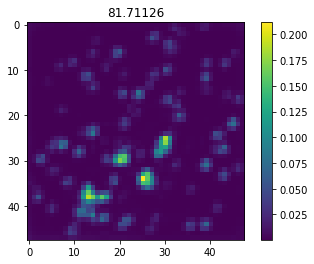

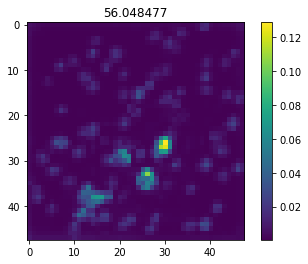

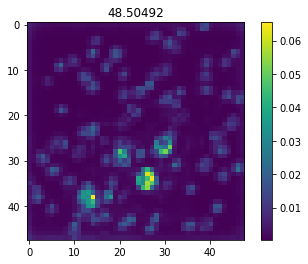

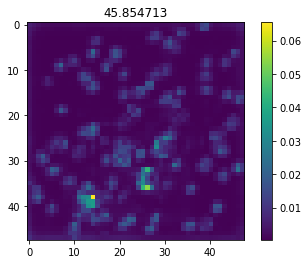

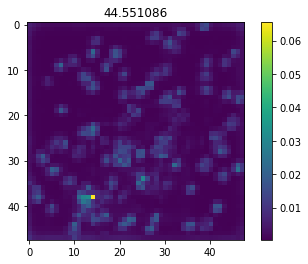

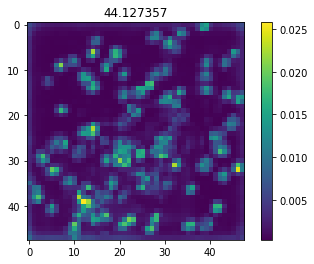

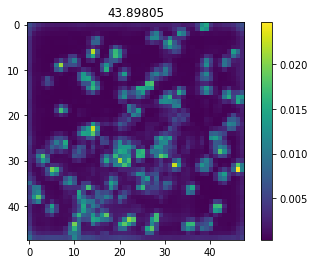

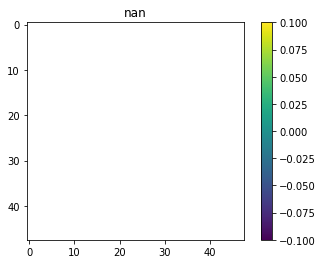

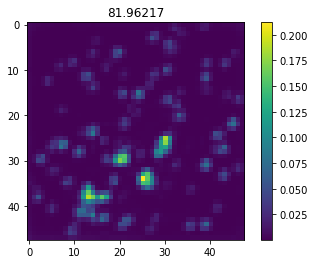

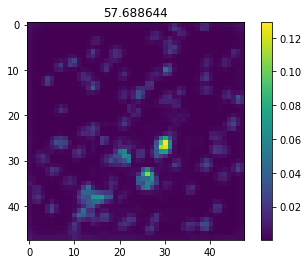

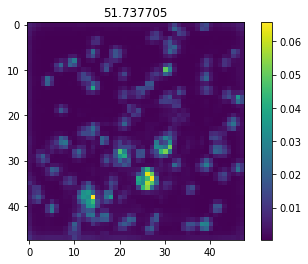

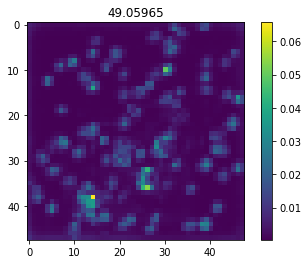

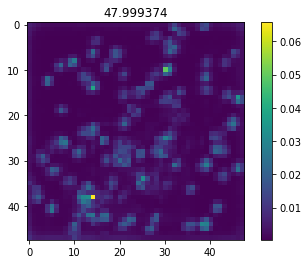

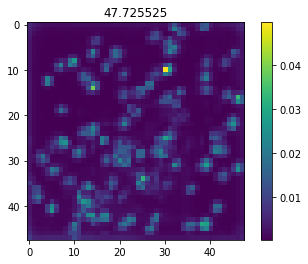

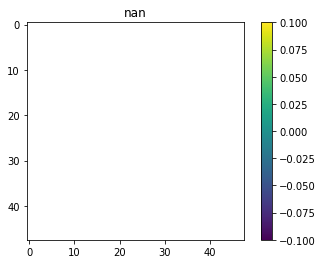

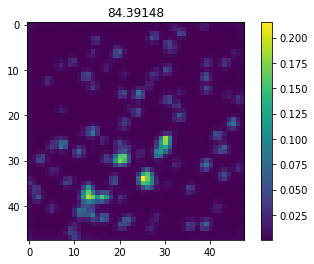

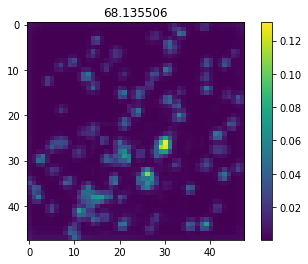

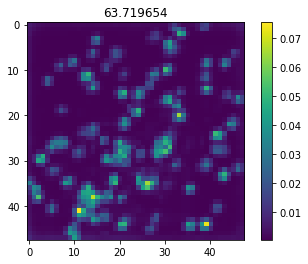

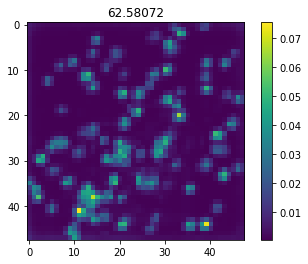

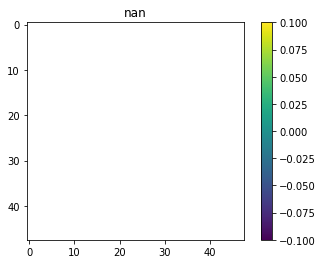

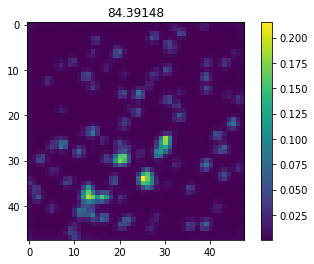

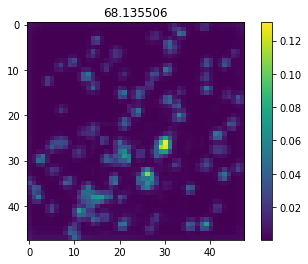

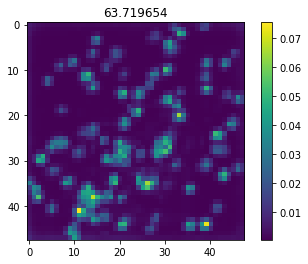

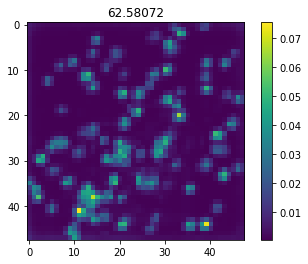

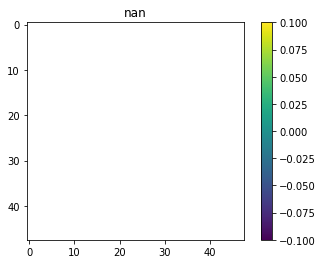

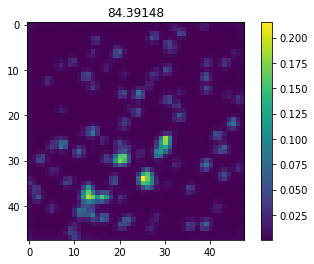

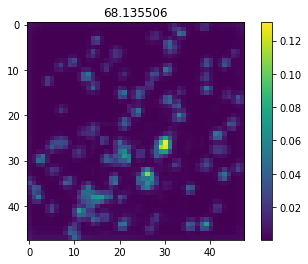

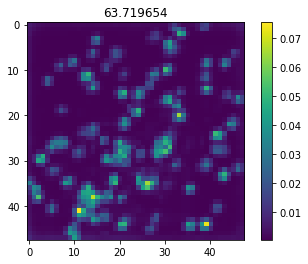

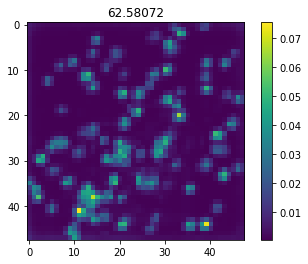

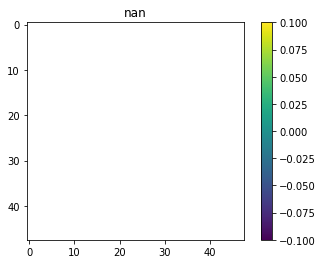

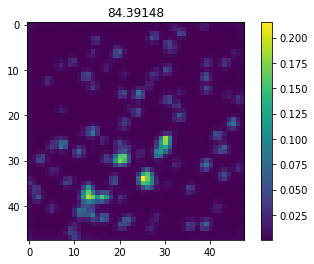

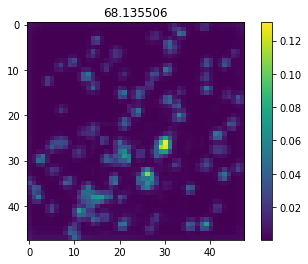

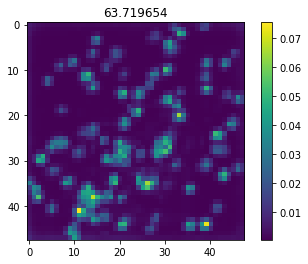

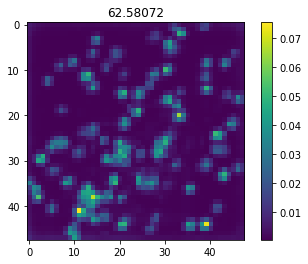

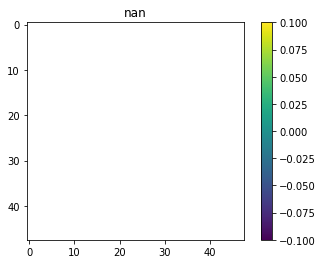

In [ ]:
for p in p_col:
    plt.imshow(p[0,0].cpu().numpy().max(0))
    plt.title(p[0,0].cpu().numpy().sum())
    plt.colorbar()
    plt.show()

tensor(1.8678)


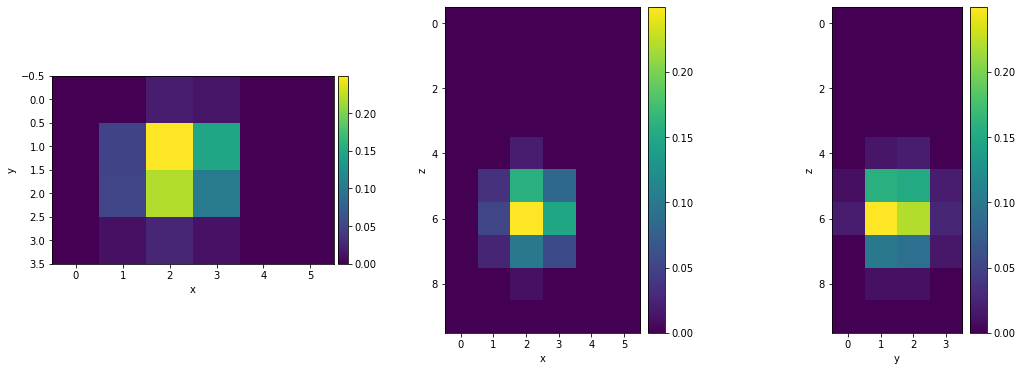

In [ ]:
plot_3d_projections(probs[5:15,44:,34:40], 'max')
print(probs[5:15,44:,34:40].sum())

(array([1.10259e+05, 2.06000e+02, 5.20000e+01, 3.10000e+01, 1.30000e+01,
        1.10000e+01, 7.00000e+00, 8.00000e+00, 0.00000e+00, 5.00000e+00]),
 array([2.4743142e-05, 7.3928811e-02, 1.4783287e-01, 2.2173694e-01,
        2.9564101e-01, 3.6954507e-01, 4.4344914e-01, 5.1735324e-01,
        5.9125727e-01, 6.6516137e-01, 7.3906541e-01], dtype=float32),
 <BarContainer object of 10 artists>)

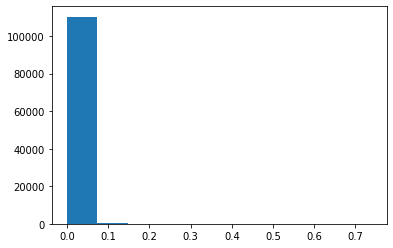

In [ ]:
plt.hist(probs.reshape(-1).numpy())

Text(0.5, 1.0, '2.4885129928588867')

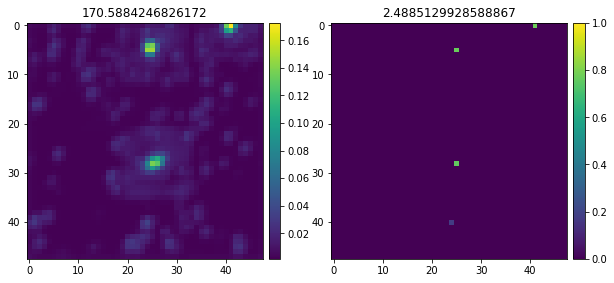

In [ ]:
probs_si = post_proc.spatial_integration(probs_inp)

plt.figure(figsize=(10,5))
plt.subplot(121)
probs = probs_inp[0,0].detach().cpu()
# probs[probs<0.01] = 0
im = plt.imshow(probs.max(dim=0).values)
plt.title(probs.sum().item())
add_colorbar(im)
plt.subplot(122)
im = plt.imshow(probs_si[0,0].cpu().max(dim=0).values, vmax=1)
add_colorbar(im)
plt.title(probs_si[0].sum().item())

In [ ]:
model_out = torch.load('../data/model_output_1.pt')
out_df = post_proc2(model_out)
out_df

,loc_idx,frame_idx,x,y,z,prob,int,int_sig,x_sig,y_sig,z_sig
0,0,0,811.790955,1518.304199,100.611565,0.171860,0.746066,0.181192,9.735320,9.856243,17.009920
1,1,0,757.667969,513.304199,95.219490,0.739548,0.795610,0.101314,4.362606,4.324372,6.956621
2,2,0,810.451111,1522.400513,142.510391,0.340551,0.841991,0.113622,6.207741,5.521046,9.254387
3,3,0,819.209473,1523.024902,138.445892,0.364614,0.811295,0.116416,4.794523,4.941160,8.449712
4,4,0,816.354736,1524.338989,146.961670,1.279463,0.847450,0.126523,4.698750,4.884948,7.432181
...,...,...,...,...,...,...,...,...,...,...,...
374,374,0,3418.935791,4603.155273,4707.065918,0.381243,0.798968,0.091368,4.679974,4.225513,7.495026
375,375,0,3411.747070,4607.343262,4706.444336,1.281189,0.856702,0.105119,4.368041,4.125608,6.490842
376,376,0,3455.059814,4608.461914,4705.541016,0.163221,0.674841,0.081988,8.215507,7.615615,11.739887
377,377,0,3420.222412,4607.221680,4704.833984,0.542263,0.840019,0.148112,5.328904,6.125201,8.839601


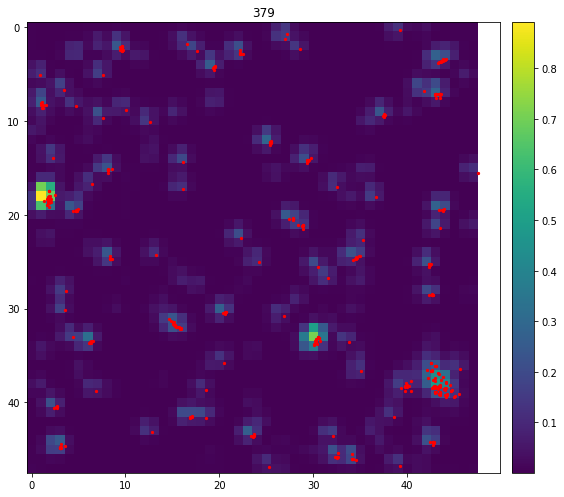

In [ ]:
plt.figure(figsize=(20,20))
plt.subplot(121)
im = plt.imshow(probs_inp[0,0].cpu().max(dim=0).values)
add_colorbar(im)
plt.title(len(out_df))
plt.scatter(out_df['x']/100,out_df['y']/100, color='red', s=5.)

In [ ]:
model_out = torch.load('../data/model_batch_output.pt')

In [ ]:
from decode_fish.engine.psf import LinearInterpolatedPSF
from decode_fish.engine.noise import sCMOS
from decode_fish.engine.point_process import PointProcessUniform
from decode_fish.funcs.plotting import plot_3d_projections
from decode_fish.engine.microscope import Microscope

psf_state = torch.load('/groups/turaga/home/speisera/Mackebox/Artur/WorkDB/deepstorm/fishcod/simfish_psf.pkl')
_,xs,ys,zs = psf_state['psf_volume'].shape
psf = LinearInterpolatedPSF(fs_x=xs, fs_y=ys, fs_z=zs, upsample_factor= 1)
psf.load_state_dict(psf_state)

noise = sCMOS()

micro = Microscope(parametric_psf=[psf], noise=noise, multipl=10000).cuda()

point_process = PointProcessUniform(local_rate = torch.ones([1,1,48,48,48]).cuda()*.0001, min_int = 0.5)
locs_3d, x_os_3d, y_os_3d, z_os_3d, ints_3d, output_shape = point_process.sample()

TypeError: __init__() got an unexpected keyword argument 'fs_x'

In [ ]:
xsim = micro(locs_3d, x_os_3d, y_os_3d, z_os_3d, ints_3d, output_shape)
xrec = micro(locs_mod, x_os_mod, y_os_mod, z_os_mod, ints_mod, output_shape_mod)

NameError: name 'micro' is not defined

In [ ]:
plot_3d_projections(xsim[0,0])

In [ ]:
plot_3d_projections(xrec[0,0])

In [ ]:
!nbdev_build_lib

Converted 00_models.ipynb.
Converted 01_psf.ipynb.
Converted 02_microscope.ipynb.
Converted 03_noise.ipynb.
Converted 04_pointsource.ipynb.
Converted 05_gmm_loss.ipynb.
Converted 06_plotting.ipynb.
Converted 07_file_io.ipynb.
Converted 08_dataset.ipynb.
Converted 09_output_trafo.ipynb.
Converted 10_evaluation.ipynb.
Converted 11_emitter_io.ipynb.
Converted 12_utils.ipynb.
Converted 13_train.ipynb.
Converted 15_fit_psf.ipynb.
Converted 16_visualization.ipynb.
Converted index.ipynb.
